In [ ]:
## Task2. Algorithms for unconstrained nonlinear optimization. Direct methods
## Chernov Igor J4234c

In [ ]:
# eps = 0.001 
# one-dimensional methods: 
#      - exhaustive search (brute-force search)
#      - dichotomy
#      - golden section search

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from functools import partial

In [2]:
def cube_func(x, f_count):
    f_count += 1
    return [x ** 3, f_count]

In [3]:
def abs_func(x, f_count):
    f_count += 1
    return [math.fabs(x - 0.2), f_count]

In [4]:
def sin_func(x, f_count):
    f_count += 1
    return [x * np.sin(1/x), f_count]

In [5]:
eps = 1e-3

In [6]:
# exhaustive search method (brute-force search)
def exhaustive_method(a, b, func):
    f_count = 0
    it = 1 #number of iterations
    n = int((b - a) / eps)
    arg = a
    f_min, f_count = func(a, f_count) # k = 0
    for k in range(1, n):
        it += 1
        x = a + k * (b - a) / n
        f, f_count = func(x, f_count)
        if(f <= f_min):
            arg = x
            f_min = f
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(arg, f_min, f_count, it))
#     print('x = ', arg)
#     print('f(x) = ', f_min)

In [7]:
# dichotomy 
def dichotomy(a, b, func):
    f_count = 0 #number of function calculations
    it = 1
    delta = eps / 2
    x1 = (a + b - delta) / 2
    x2 = (a + b + delta) / 2
    f1, f_count = func(x1, f_count)
    f2, f_count = func(x2, f_count)
    while(abs(a - b) >= eps):
        it += 1
        if(f1 <= f2):
            b = x2
        else:
            a = x1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f1, f_count = func(x1, f_count)
        f2, f_count = func(x2, f_count)
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [8]:
# golden section search
def goldenSection_func(a, b, func):
    f_count = 0 # number of function calculations
    it = 1 # number of iterations
    alpha1 = (3 - 5 ** 0.5) / 2
    alpha2 = (5 ** 0.5 - 3) / 2
    
    x1 = a + alpha1 * (b - a)
    x2 = b + alpha2 * (b - a)
    f_x1, f_count = func(x1, f_count)
    f_x2, f_count = func(x2, f_count)
    
    while(abs(a - b) >= eps):
        it += 1
        f_x1, f_count = func(x1, f_count)
        f_x2, f_count = func(x2, f_count)
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            x1 = a + alpha1 * (b - a)
        else:
            a = x1 
            x1 = x2
            x2 = b + alpha2 * (b - a)
            
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [9]:
print('Exhaustive search (Brute-force)')
exhaustive_method(0, 1, cube_func)
exhaustive_method(0, 1, abs_func)
exhaustive_method(0.01, 1, sin_func)

print('\nDichotomy search method')
dichotomy(0, 1, cube_func)
dichotomy(0, 1, abs_func)
dichotomy(0.01, 1, sin_func)

print('\nGolden section search method')
goldenSection_func(0, 1, cube_func)
goldenSection_func(0, 1, abs_func)
goldenSection_func(0.01, 1, sin_func)

Exhaustive search (Brute-force)
<function cube_func at 0x0000026A23A57A60>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function abs_func at 0x0000026A267DCC20>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function sin_func at 0x0000026A267DCE00>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 990 Iterations: 990

Dichotomy search method
<function cube_func at 0x0000026A23A57A60>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function abs_func at 0x0000026A267DCC20>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function sin_func at 0x0000026A267DCE00>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 25 Iterations: 12

Golden section search method
<function cube_func at 0x0000026A23A57A60>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 33 Iterations: 16
<function abs_func at 0x0000026A267DCC20>:	  arg = 0.200 Minimum: 0.000 Number of f-ca

In [46]:
alpha, beta = random.random(), random.random()
print(alpha, beta)

0.27393126511250065 0.20381879372870115


In [47]:
# noisy data generation
x = []
yk = []
y_init = []
for k in range(101):
    x.append(k / 100)
    y_init.append(alpha * x[k] + beta)
    yk.append(y_init[k] + np.random.normal(0, 1))

In [48]:
# linear approximation function

def linear_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a * x[i] + b)
    return np.array(y)

In [49]:
# rational approximation function
def rational_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a / (1 + b * x[i]))
    return np.array(y)

In [50]:
def least_squares_linear(params, y_f, x):
    a, b = params
    return np.sum((linear_approx_func(x, a, b) - y_f) ** 2)

In [51]:
def least_squares_rational(params, y_f, x):
    a, b = params
    return np.sum((rational_approx_func(x, a, b) - y_f) ** 2)

In [52]:
# linear optimization brute
a_brute_lin, b_brute_lin = scipy.optimize.brute(least_squares_linear, [[0, 1],[0, 1]], args=(yk, x))
print('Linear optimization (exhaustive search method):\n', a_brute_lin, b_brute_lin)

# linear optimization Gauss method
powell_lin = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Powell', tol=eps)
print('\nLinear optimization (Gauss search method):\n', powell_lin)

# linear optimization Nelder-Mead
nelderMead_lin = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Nelder-Mead', tol=eps)
print('\nLinear optimization (Nelder-Mead method):\n', nelderMead_lin)

Linear optimization (exhaustive search method):
 0.15162944350465146 0.4447051586374937

Linear optimization (Gauss search method):
  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 119.35938633848168
       x: [ 1.516e-01  4.447e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [-4.781e-01  2.391e-01]]
    nfev: 70

Linear optimization (Nelder-Mead method):
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 119.35938708586907
             x: [ 1.516e-01  4.446e-01]
           nit: 47
          nfev: 91
 final_simplex: (array([[ 1.516e-01,  4.446e-01],
                       [ 1.520e-01,  4.447e-01],
                       [ 1.507e-01,  4.455e-01]]), array([ 1.194e+02,  1.194e+02,  1.194e+02]))


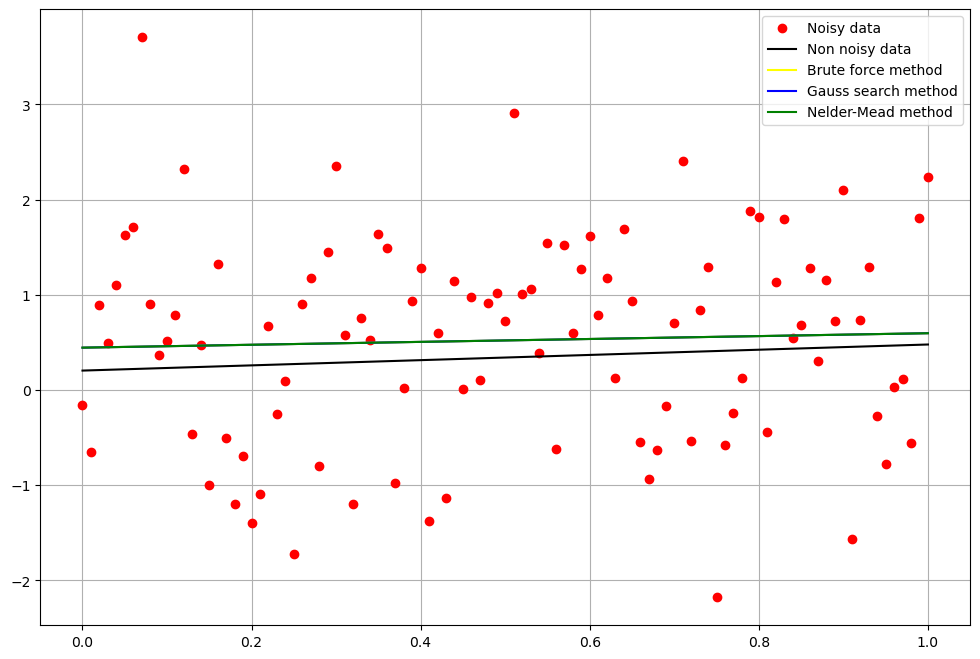

In [53]:
y_linear_opt_brute = []
for i in range(101):
    y_linear_opt_brute.append(a_brute_lin * x[i] + b_brute_lin)

y_linear_opt_powell = []
for i in range(101):
    y_linear_opt_powell.append(powell_lin.x[0] * x[i] + powell_lin.x[1])
    
y_linear_opt_nelderMead = []
for i in range(101):
    y_linear_opt_nelderMead.append(nelderMead_lin.x[0] * x[i] + nelderMead_lin.x[1])
    
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk, 'ro')
plt.plot(x, y_init, color='black')
plt.plot(x, y_linear_opt_brute, color='yellow')
plt.plot(x, y_linear_opt_powell, color='blue')
plt.plot(x, y_linear_opt_nelderMead, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Brute force method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()

In [54]:
# rational optimization brute
a_brute_rat, b_brute_rat = scipy.optimize.brute(least_squares_rational, [[0, 1],[0, 1]], args=(yk, x))
print('Rational optimization (exhaustive search method):\n', a_brute_rat, b_brute_rat)

# rational optimization Gauss method
powell_rat = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Powell', tol=eps)
print('\nRational optimization (Gauss search method):\n', powell_rat)

# rational optimization Nelder-Mead
nelderMead_rat = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Nelder-Mead', tol=eps)
print('\nRationl optimization (Nelder-Mead method):\n', nelderMead_rat)

Rational optimization (exhaustive search method):
 0.4468475920907705 -0.2683739148703577

Rational optimization (Gauss search method):
  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 119.4340143172866
       x: [ 5.017e-01 -1.266e-01]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 42

Rationl optimization (Nelder-Mead method):
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 119.3414327113932
             x: [ 4.468e-01 -2.684e-01]
           nit: 59
          nfev: 113
 final_simplex: (array([[ 4.468e-01, -2.684e-01],
                       [ 4.467e-01, -2.692e-01],
                       [ 4.471e-01, -2.685e-01]]), array([ 1.193e+02,  1.193e+02,  1.193e+02]))


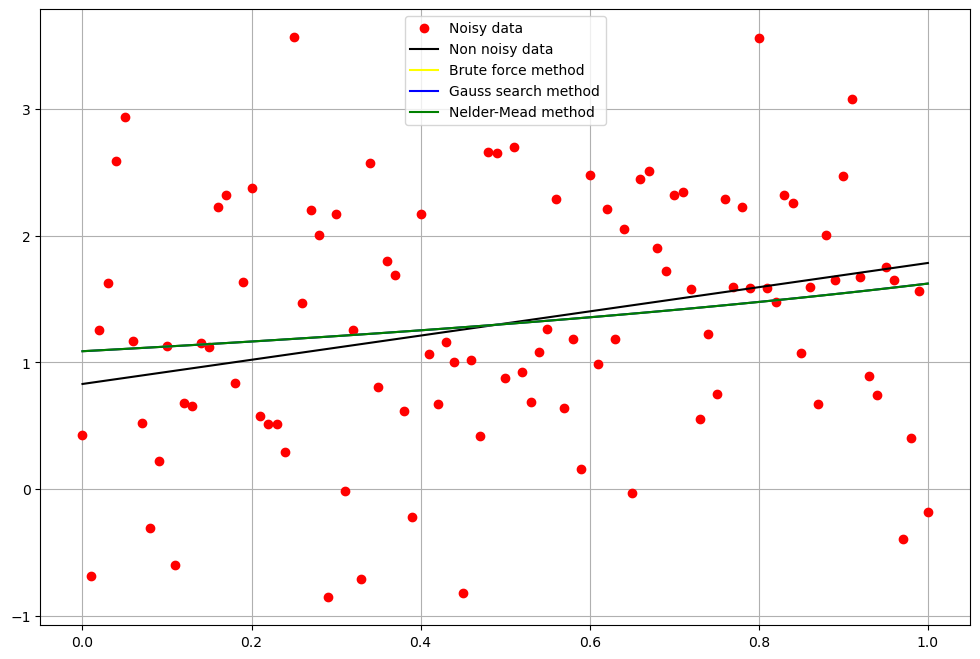

In [32]:
y_rational_opt_brute = []
for i in range(101):
    y_rational_opt_brute.append(a_brute_rat / (1 + b_brute_rat * x[i]))

y_rational_opt_powell = []
for i in range(101):
    y_rational_opt_powell.append(powell_rat.x[0] / (1 + powell_rat.x[1] * x[i]))
    
y_rational_opt_nelderMead = []
for i in range(101):
    y_rational_opt_nelderMead.append(nelderMead_rat.x[0] / (1 + nelderMead_rat.x[1] * x[i]))
    
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk, 'ro')
plt.plot(x, y_init, color='black')
plt.plot(x, y_rational_opt_brute, color='yellow')
plt.plot(x, y_rational_opt_powell, color='blue')
plt.plot(x, y_rational_opt_nelderMead, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Brute force method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()